In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [ ]:
from app.services.graph import GraphRoute
from app.services.algoritms.a_star import optimized_multi_objective_routing
from app.services.algoritms.dijkstra import dijkstra_multi_objective
from app.services.algoritms.aco import aco_optimized_routing
from app.services.solution import plot_pareto
from app.utils.time import time_to_seconds
from app.utils.map import create_comparison_map_detailed

In [3]:
graph = GraphRoute(
    origem="Casa da Musica",
    destino="Casino da Póvoa de Varzim, 4490-403",
)

Fusão concluída: 922 paragens no corredor intermodal.
Analisando 2536 pares candidatos para transferência real...


In [4]:
# --- Parâmetros de Roteamento ---
START_TIME = '08:00:00'
start_sec = time_to_seconds(START_TIME)

print("\n--- ROTEAMENTO MULTI-OBJETIVO E TIME-DEPENDENT ---\n")
print(f" * {graph.G.nodes[graph.origem_node_id]['name']} - {graph.origem}")
print(f"    - (lat: {graph.geo_origem.y} lon: {graph.geo_origem.x})")
print(f" * {graph.G.nodes[graph.destino_node_id]['name']} - {graph.destino}")
print(f"    - (lat: {graph.geo_destino.y} lon: {graph.geo_destino.x})\n")
print(f"Início da Viagem: {START_TIME}")


--- ROTEAMENTO MULTI-OBJETIVO E TIME-DEPENDENT ---

 * Ponto de Partida - Casa da Musica
    - (lat: 41.1589025 lon: -8.6307748)
 * Ponto de Chegada - Casino da Póvoa de Varzim, 4490-403
    - (lat: 41.3787241 lon: -8.7661968)

Início da Viagem: 08:00:00


In [5]:
print("\n--- Algoritmo A* ---")

a_star_pareto_solutions = optimized_multi_objective_routing(
    graph.G, graph.origem_node_id, graph.destino_node_id, start_sec
)

print(f"\n✅ Algoritmo concluído. Encontradas {len(a_star_pareto_solutions)} soluções não dominadas (Fronteira de Pareto).")


--- Algoritmo A* ---

✅ Algoritmo concluído. Encontradas 3 soluções não dominadas (Fronteira de Pareto).


/Users/diego/Workspace/Simb/mia/trabalhos/CIN_GRUPO6/code/app/services/solution.py:255: UserWarning: Glyph 128640 (\N{ROCKET}) missing from font(s) Arial.
  plt.tight_layout()
/Users/diego/Workspace/Simb/mia/trabalhos/CIN_GRUPO6/code/app/services/solution.py:255: UserWarning: Glyph 127807 (\N{HERB}) missing from font(s) Arial.
  plt.tight_layout()
/Users/diego/Library/Caches/pypoetry/virtualenvs/cin-grupo6-azr-MXmh-py3.13/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128640 (\N{ROCKET}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/diego/Library/Caches/pypoetry/virtualenvs/cin-grupo6-azr-MXmh-py3.13/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127807 (\N{HERB}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


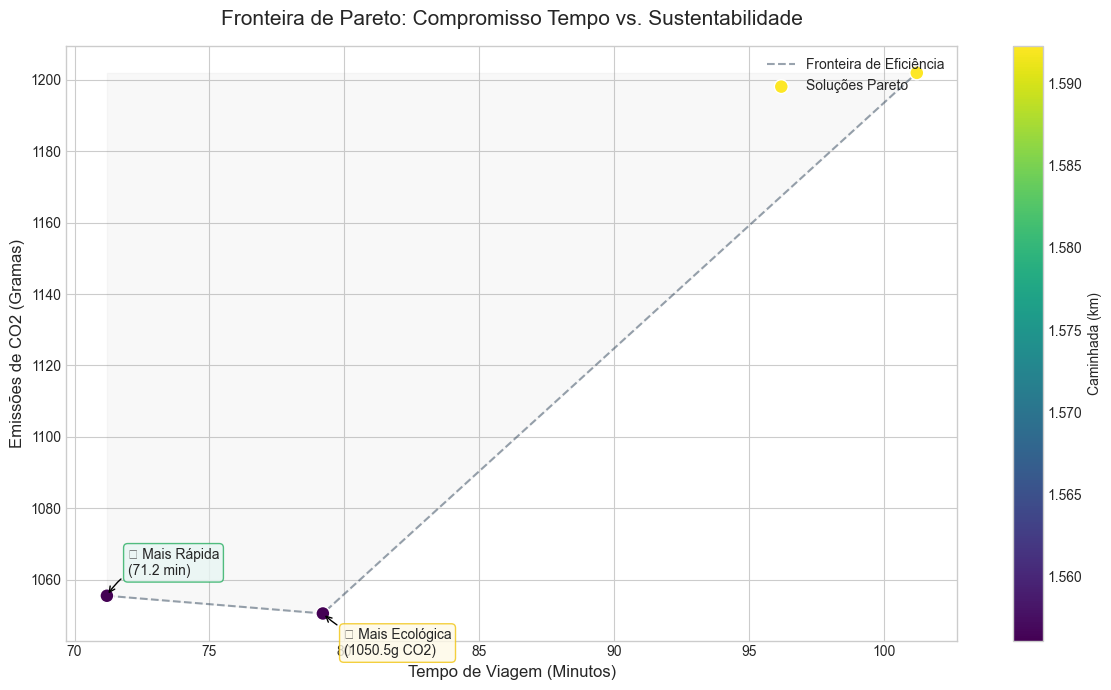

In [6]:
plot_pareto(a_star_pareto_solutions)

In [23]:
create_comparison_map_detailed(
    a_star_pareto_solutions,
    graph.G,
    graph.G_walk,
    graph.stops_df,
)

In [25]:
best_sol_time = min(a_star_pareto_solutions, key=lambda s: s.total_time)
print(best_sol_time.summarize_solution(graph.G, start_sec))


Tempo Total: 1h 11m 12s
CO2 Total: 1055.46 g
Hora de Partida: 8h 0m 0s
Hora de Chegada: 9h 11m 12s
--- Detalhes do Percurso ---
 🚶 Caminhada: De Ponto de Partida para Francos (0h 10m 30s)
 🚌/🚇 Trânsito (Viagem METRO_ADF3): De Francos para Ramalde - (Viagem: 0h 3m 30s)
 🚌/🚇 Trânsito (Viagem METRO_ADF3): De Ramalde para Viso - (Viagem: 0h 2m 0s)
 🚌/🚇 Trânsito (Viagem METRO_FS3): De Viso para NorteShopping I Sete Bicas - (Viagem: 0h 2m 0s)
 🚌/🚇 Trânsito (Viagem METRO_FS3): De NorteShopping I Sete Bicas para Senhora da Hora - (Viagem: 0h 1m 0s)
 🚌/🚇 Trânsito (Viagem METRO_BU4): De Senhora da Hora para Fonte do Cuco - (Viagem: 0h 4m 0s)
 🚌/🚇 Trânsito (Viagem METRO_BU4): De Fonte do Cuco para Custóias - (Viagem: 0h 2m 0s)
 🚌/🚇 Trânsito (Viagem METRO_BU4): De Custóias para Esposade - (Viagem: 0h 2m 0s)
 🚌/🚇 Trânsito (Viagem METRO_BU4): De Esposade para Crestins - (Viagem: 0h 3m 0s)
 🚌/🚇 Trânsito (Viagem METRO_BU4): De Crestins para Verdes - (Viagem: 0h 1m 0s)
 🚌/🚇 Trânsito (Viagem METRO_BU4)

In [27]:
best_sol_co2 = min(a_star_pareto_solutions, key=lambda s: s.total_co2)
print(best_sol_co2.summarize_solution(graph.G, start_sec))


Tempo Total: 1h 19m 12s
CO2 Total: 1050.50 g
Hora de Partida: 8h 0m 0s
Hora de Chegada: 9h 19m 12s
--- Detalhes do Percurso ---
 🚶 Caminhada: De Ponto de Partida para Francos (0h 10m 30s)
 🚌/🚇 Trânsito (Viagem METRO_ADF3): De Francos para Ramalde - (Viagem: 0h 3m 30s)
 🚌/🚇 Trânsito (Viagem METRO_ADF3): De Ramalde para Viso - (Viagem: 0h 2m 0s)
 🚌/🚇 Trânsito (Viagem METRO_FS3): De Viso para NorteShopping I Sete Bicas - (Viagem: 0h 2m 0s)
 🚌/🚇 Trânsito (Viagem METRO_FS3): De NorteShopping I Sete Bicas para Senhora da Hora - (Viagem: 0h 1m 0s)
 🚌/🚇 Trânsito (Viagem METRO_BexpU3): De Senhora da Hora para Pedras Rubras - (Viagem: 0h 29m 0s)
 🚌/🚇 Trânsito (Viagem METRO_BexpU3): De Pedras Rubras para VC Fashion Outlet I Modivas - (Viagem: 0h 7m 0s)
 🚌/🚇 Trânsito (Viagem METRO_BexpU3): De VC Fashion Outlet I Modivas para Mindelo - (Viagem: 0h 2m 0s)
 🚌/🚇 Trânsito (Viagem METRO_BexpU3): De Mindelo para Varziela - (Viagem: 0h 4m 0s)
 🚌/🚇 Trânsito (Viagem METRO_BexpU3): De Varziela para Vila do 

In [26]:
best_sol_walk = max(a_star_pareto_solutions, key=lambda s: s.total_walk_km)
print(best_sol_walk.summarize_solution(graph.G, start_sec))


Tempo Total: 1h 41m 12s
CO2 Total: 1201.97 g
Hora de Partida: 8h 0m 0s
Hora de Chegada: 9h 41m 12s
--- Detalhes do Percurso ---
 🚶 Caminhada: De Ponto de Partida para CARVALHIDO (0h 10m 56s)
 🚌/🚇 Trânsito (Viagem STCP_204_0_U_100): De CARVALHIDO para CASA DE SAÚDE DA BOAVISTA - (Viagem: 0h 6m 17s)
 🚌/🚇 Trânsito (Viagem STCP_204_0_U_100): De CASA DE SAÚDE DA BOAVISTA para MOREIRA SÁ - (Viagem: 0h 3m 33s)
 🚌/🚇 Trânsito (Viagem STCP_203_0_U_20): De MOREIRA SÁ para CASA DA MÚSICA (METRO) - (Viagem: 0h 13m 37s)
 🚶 Caminhada: De CASA DA MÚSICA (METRO) para Casa da Música (0h 6m 53s)
 🚌/🚇 Trânsito (Viagem METRO_BU5): De Casa da Música para Francos - (Viagem: 0h 3m 43s)
 🚌/🚇 Trânsito (Viagem METRO_BU5): De Francos para Ramalde - (Viagem: 0h 2m 0s)
 🚌/🚇 Trânsito (Viagem METRO_BU5): De Ramalde para Viso - (Viagem: 0h 2m 0s)
 🚌/🚇 Trânsito (Viagem METRO_BDF5): De Viso para NorteShopping I Sete Bicas - (Viagem: 0h 2m 0s)
 🚌/🚇 Trânsito (Viagem METRO_BDF5): De NorteShopping I Sete Bicas para Senhora

In [29]:
print("\n--- Algoritmo ACO ---")

aco_pareto_solutions = aco_optimized_routing(
    graph.G, graph.origem_node_id, graph.destino_node_id, start_sec
)

print(f"\n✅ Algoritmo concluído. Encontradas {len(aco_pareto_solutions)} soluções não dominadas (Fronteira de Pareto).")


--- Algoritmo ACO ---
🚀 Iniciando ACO Agressivo: 30 formigas, 20 gerações...
  Iteração 0: 0 soluções na fronteira.
  Iteração 5: 4 soluções na fronteira.
  Iteração 10: 4 soluções na fronteira.
  Iteração 15: 4 soluções na fronteira.

✅ Algoritmo concluído. Encontradas 4 soluções não dominadas (Fronteira de Pareto).


/Users/diego/Workspace/Simb/mia/trabalhos/CIN_GRUPO6/code/app/services/solution.py:255: UserWarning: Glyph 128640 (\N{ROCKET}) missing from font(s) Arial.
  plt.tight_layout()
/Users/diego/Workspace/Simb/mia/trabalhos/CIN_GRUPO6/code/app/services/solution.py:255: UserWarning: Glyph 127807 (\N{HERB}) missing from font(s) Arial.
  plt.tight_layout()
/Users/diego/Library/Caches/pypoetry/virtualenvs/cin-grupo6-azr-MXmh-py3.13/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128640 (\N{ROCKET}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/diego/Library/Caches/pypoetry/virtualenvs/cin-grupo6-azr-MXmh-py3.13/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127807 (\N{HERB}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


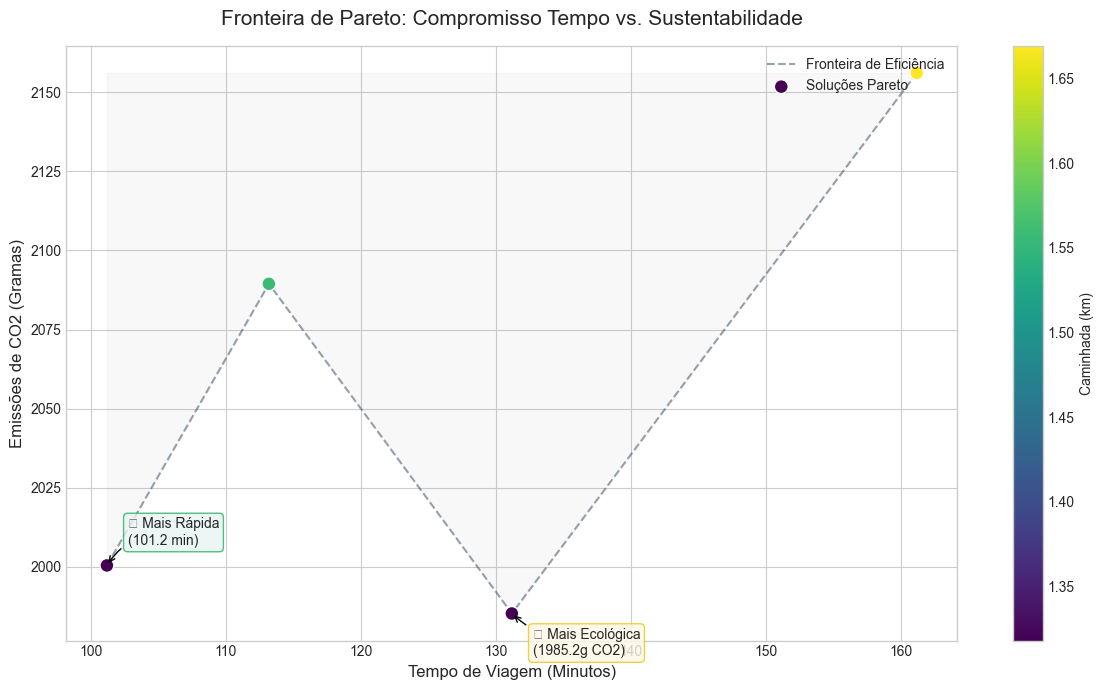

In [30]:
plot_pareto(aco_pareto_solutions)

In [31]:
create_comparison_map_detailed(
    aco_pareto_solutions,
    graph.G,
    graph.G_walk,
    graph.stops_df,
)

In [32]:
best_sol_time = min(aco_pareto_solutions, key=lambda s: s.total_time)
print(best_sol_time.summarize_solution(graph.G, start_sec))


Tempo Total: 1h 41m 12s
CO2 Total: 2000.43 g
Hora de Partida: 8h 0m 0s
Hora de Chegada: 9h 41m 12s
--- Detalhes do Percurso ---
 🚶 Caminhada: De Ponto de Partida para QUINTA AMARELA (0h 7m 38s)
 🚌/🚇 Trânsito (Viagem STCP_300_0_U_17): De QUINTA AMARELA para CARVALHIDO - (Viagem: 0h 2m 22s)
 🚌/🚇 Trânsito (Viagem STCP_300_0_U_17): De CARVALHIDO para HOSP. PRELADA - (Viagem: 0h 3m 10s)
 🚌/🚇 Trânsito (Viagem STCP_300_0_U_17): De HOSP. PRELADA para CINTURA INTERNA - (Viagem: 0h 3m 51s)
 🚌/🚇 Trânsito (Viagem STCP_300_0_U_17): De CINTURA INTERNA para PARQUE DA PRELADA - (Viagem: 0h 2m 59s)
 🚌/🚇 Trânsito (Viagem STCP_602_0_S_29): De PARQUE DA PRELADA para S.RA DO PORTO - (Viagem: 0h 4m 30s)
 🚌/🚇 Trânsito (Viagem STCP_602_0_S_29): De S.RA DO PORTO para MONTE DOS BURGOS - (Viagem: 0h 1m 30s)
 🚌/🚇 Trânsito (Viagem STCP_602_0_S_29): De MONTE DOS BURGOS para C. SEIXO (SUL) - (Viagem: 0h 0m 45s)
 🚌/🚇 Trânsito (Viagem STCP_602_0_S_29): De C. SEIXO (SUL) para FOGUETEIROS (SUL) - (Viagem: 0h 0m 43s)
 🚌

In [33]:
best_sol_co2 = min(aco_pareto_solutions, key=lambda s: s.total_co2)
print(best_sol_co2.summarize_solution(graph.G, start_sec))


Tempo Total: 2h 11m 12s
CO2 Total: 1985.24 g
Hora de Partida: 8h 0m 0s
Hora de Chegada: 10h 11m 12s
--- Detalhes do Percurso ---
 🚶 Caminhada: De Ponto de Partida para QUINTA AMARELA (0h 7m 38s)
 🚌/🚇 Trânsito (Viagem STCP_300_0_U_17): De QUINTA AMARELA para CARVALHIDO - (Viagem: 0h 2m 22s)
 🚌/🚇 Trânsito (Viagem STCP_300_0_U_17): De CARVALHIDO para HOSP. PRELADA - (Viagem: 0h 3m 10s)
 🚌/🚇 Trânsito (Viagem STCP_300_0_U_17): De HOSP. PRELADA para CINTURA INTERNA - (Viagem: 0h 3m 51s)
 🚌/🚇 Trânsito (Viagem STCP_300_0_U_17): De CINTURA INTERNA para PARQUE DA PRELADA - (Viagem: 0h 2m 59s)
 🚌/🚇 Trânsito (Viagem STCP_602_0_S_29): De PARQUE DA PRELADA para S.RA DO PORTO - (Viagem: 0h 4m 30s)
 🚌/🚇 Trânsito (Viagem STCP_602_0_S_29): De S.RA DO PORTO para MONTE DOS BURGOS - (Viagem: 0h 1m 30s)
 🚌/🚇 Trânsito (Viagem STCP_602_0_S_29): De MONTE DOS BURGOS para C. SEIXO (SUL) - (Viagem: 0h 0m 45s)
 🚌/🚇 Trânsito (Viagem STCP_602_0_S_29): De C. SEIXO (SUL) para FOGUETEIROS (SUL) - (Viagem: 0h 0m 43s)
 

In [34]:
best_sol_walk = max(aco_pareto_solutions, key=lambda s: s.total_walk_km)
print(best_sol_walk.summarize_solution(graph.G, start_sec))


Tempo Total: 2h 41m 12s
CO2 Total: 2156.15 g
Hora de Partida: 8h 0m 0s
Hora de Chegada: 10h 41m 12s
--- Detalhes do Percurso ---
 🚶 Caminhada: De Ponto de Partida para CARVALHIDO (0h 11m 51s)
 🚌/🚇 Trânsito (Viagem STCP_602_1_U_18): De CARVALHIDO para QUINTA AMARELA - (Viagem: 0h 7m 1s)
 🚌/🚇 Trânsito (Viagem STCP_602_1_U_18): De QUINTA AMARELA para CRUZ VERMELHA - (Viagem: 0h 1m 1s)
 🚌/🚇 Trânsito (Viagem STCP_602_1_U_18): De CRUZ VERMELHA para CAROLINA MICHAELIS - (Viagem: 0h 2m 36s)
 🚶 Caminhada: De CAROLINA MICHAELIS para Carolina Michaelis (0h 6m 28s)
 🚶 Caminhada: De Carolina Michaelis para CAROLINA MICHAELIS (0h 6m 37s)
 🚌/🚇 Trânsito (Viagem STCP_602_0_U_32): De CAROLINA MICHAELIS para CRUZ VERMELHA - (Viagem: 0h 2m 46s)
 🚌/🚇 Trânsito (Viagem STCP_602_0_U_32): De CRUZ VERMELHA para QUINTA AMARELA - (Viagem: 0h 0m 45s)
 🚌/🚇 Trânsito (Viagem STCP_602_0_U_32): De QUINTA AMARELA para CARVALHIDO - (Viagem: 0h 2m 6s)
 🚌/🚇 Trânsito (Viagem STCP_602_0_U_32): De CARVALHIDO para HOSP. PRELA

In [35]:
print("\n--- Algoritmo Dijkstra ---")

dijkstra_pareto_solutions = dijkstra_multi_objective(
    graph.G, graph.origem_node_id, graph.destino_node_id, start_sec
)

print(f"\n✅ Algoritmo concluído. Encontradas {len(dijkstra_pareto_solutions)} soluções não dominadas (Fronteira de Pareto).")


--- Algoritmo Dijkstra ---

✅ Algoritmo concluído. Encontradas 8 soluções não dominadas (Fronteira de Pareto).


/Users/diego/Workspace/Simb/mia/trabalhos/CIN_GRUPO6/code/app/services/solution.py:255: UserWarning: Glyph 128640 (\N{ROCKET}) missing from font(s) Arial.
  plt.tight_layout()
/Users/diego/Workspace/Simb/mia/trabalhos/CIN_GRUPO6/code/app/services/solution.py:255: UserWarning: Glyph 127807 (\N{HERB}) missing from font(s) Arial.
  plt.tight_layout()
/Users/diego/Library/Caches/pypoetry/virtualenvs/cin-grupo6-azr-MXmh-py3.13/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128640 (\N{ROCKET}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/diego/Library/Caches/pypoetry/virtualenvs/cin-grupo6-azr-MXmh-py3.13/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127807 (\N{HERB}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


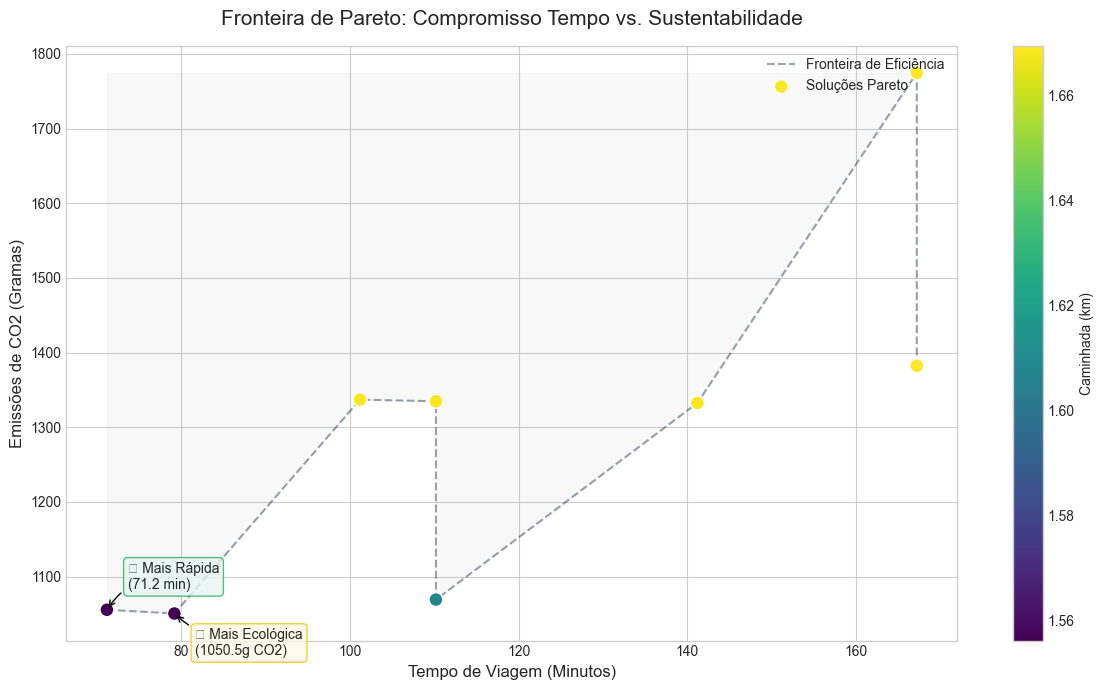

In [36]:
plot_pareto(dijkstra_pareto_solutions)

In [37]:
create_comparison_map_detailed(
    dijkstra_pareto_solutions,
    graph.G,
    graph.G_walk,
    graph.stops_df,
)

In [38]:
best_sol_time = min(dijkstra_pareto_solutions, key=lambda s: s.total_time)
print(best_sol_time.summarize_solution(graph.G, start_sec))


Tempo Total: 1h 11m 12s
CO2 Total: 1055.46 g
Hora de Partida: 8h 0m 0s
Hora de Chegada: 9h 11m 12s
--- Detalhes do Percurso ---
 🚶 Caminhada: De Ponto de Partida para Francos (0h 10m 30s)
 🚌/🚇 Trânsito (Viagem METRO_ADF3): De Francos para Ramalde - (Viagem: 0h 3m 30s)
 🚌/🚇 Trânsito (Viagem METRO_ADF3): De Ramalde para Viso - (Viagem: 0h 2m 0s)
 🚌/🚇 Trânsito (Viagem METRO_FS3): De Viso para NorteShopping I Sete Bicas - (Viagem: 0h 2m 0s)
 🚌/🚇 Trânsito (Viagem METRO_FS3): De NorteShopping I Sete Bicas para Senhora da Hora - (Viagem: 0h 1m 0s)
 🚌/🚇 Trânsito (Viagem METRO_BU4): De Senhora da Hora para Fonte do Cuco - (Viagem: 0h 4m 0s)
 🚌/🚇 Trânsito (Viagem METRO_BU4): De Fonte do Cuco para Custóias - (Viagem: 0h 2m 0s)
 🚌/🚇 Trânsito (Viagem METRO_BU4): De Custóias para Esposade - (Viagem: 0h 2m 0s)
 🚌/🚇 Trânsito (Viagem METRO_BU4): De Esposade para Crestins - (Viagem: 0h 3m 0s)
 🚌/🚇 Trânsito (Viagem METRO_BU4): De Crestins para Verdes - (Viagem: 0h 1m 0s)
 🚌/🚇 Trânsito (Viagem METRO_BU4)

In [40]:
best_sol_co2 = min(dijkstra_pareto_solutions, key=lambda s: s.total_co2)
print(best_sol_co2.summarize_solution(graph.G, start_sec))


Tempo Total: 1h 19m 12s
CO2 Total: 1050.50 g
Hora de Partida: 8h 0m 0s
Hora de Chegada: 9h 19m 12s
--- Detalhes do Percurso ---
 🚶 Caminhada: De Ponto de Partida para Francos (0h 10m 30s)
 🚌/🚇 Trânsito (Viagem METRO_ADF3): De Francos para Ramalde - (Viagem: 0h 3m 30s)
 🚌/🚇 Trânsito (Viagem METRO_ADF3): De Ramalde para Viso - (Viagem: 0h 2m 0s)
 🚌/🚇 Trânsito (Viagem METRO_FS3): De Viso para NorteShopping I Sete Bicas - (Viagem: 0h 2m 0s)
 🚌/🚇 Trânsito (Viagem METRO_FS3): De NorteShopping I Sete Bicas para Senhora da Hora - (Viagem: 0h 1m 0s)
 🚌/🚇 Trânsito (Viagem METRO_BexpU3): De Senhora da Hora para Pedras Rubras - (Viagem: 0h 29m 0s)
 🚌/🚇 Trânsito (Viagem METRO_BexpU3): De Pedras Rubras para VC Fashion Outlet I Modivas - (Viagem: 0h 7m 0s)
 🚌/🚇 Trânsito (Viagem METRO_BexpU3): De VC Fashion Outlet I Modivas para Mindelo - (Viagem: 0h 2m 0s)
 🚌/🚇 Trânsito (Viagem METRO_BexpU3): De Mindelo para Varziela - (Viagem: 0h 4m 0s)
 🚌/🚇 Trânsito (Viagem METRO_BexpU3): De Varziela para Vila do 

In [39]:
best_sol_walk = max(dijkstra_pareto_solutions, key=lambda s: s.total_walk_km)
print(best_sol_walk.summarize_solution(graph.G, start_sec))


Tempo Total: 2h 47m 12s
CO2 Total: 1382.25 g
Hora de Partida: 8h 0m 0s
Hora de Chegada: 10h 47m 12s
--- Detalhes do Percurso ---
 🚶 Caminhada: De Ponto de Partida para CARVALHIDO (0h 11m 51s)
 🚌/🚇 Trânsito (Viagem STCP_602_1_U_18): De CARVALHIDO para QUINTA AMARELA - (Viagem: 0h 7m 1s)
 🚌/🚇 Trânsito (Viagem STCP_602_1_U_18): De QUINTA AMARELA para CRUZ VERMELHA - (Viagem: 0h 1m 1s)
 🚌/🚇 Trânsito (Viagem STCP_508_1_U_69): De CRUZ VERMELHA para BOAVISTA-CASA DA MÚSICA - (Viagem: 0h 6m 49s)
 🚌/🚇 Trânsito (Viagem STCP_204_0_S_25): De BOAVISTA-CASA DA MÚSICA para BOM SUCESSO - (Viagem: 0h 5m 3s)
 🚌/🚇 Trânsito (Viagem STCP_903_0_U_141): De BOM SUCESSO para PR. DA GALIZA - (Viagem: 0h 2m 52s)
 🚌/🚇 Trânsito (Viagem STCP_503_1_U_4): De PR. DA GALIZA para R.CAMPO ALEGRE - (Viagem: 0h 22m 52s)
 🚌/🚇 Trânsito (Viagem STCP_403_1_S_25): De R.CAMPO ALEGRE para BOAVISTA - B.SUCESSO - (Viagem: 0h 10m 25s)
 🚌/🚇 Trânsito (Viagem STCP_403_1_S_25): De BOAVISTA - B.SUCESSO para BOAVISTA - B.SUCESSO - (Viage

In [41]:
def display_itineraries(solutions):
    if not solutions:
        print("❌ Nenhuma rota encontrada para os critérios selecionados.")
        return

    # Ordenar por tempo para a visualização
    sorted_sols = sorted(solutions, key=lambda s: s.total_time)

    print(f"\n{'='*60}")
    print(f"{'MODO':<12} | {'TEMPO':<10} | {'CO2 (g)':<10} | {'CAMINHADA':<10}")
    print(f"{'-'*60}")

    for i, sol in enumerate(sorted_sols):
        # Identificar o perfil da solução
        profile = "Rápida" if i == 0 else ""
        if sol == min(sorted_sols, key=lambda s: s.total_co2): profile = "Ecológica"
        if sol == max(sorted_sols, key=lambda s: s.total_walk_km): profile = "Ativa"

        mins = int(sol.total_time // 60)
        co2 = round(sol.total_co2, 1)
        walk = round(sol.total_walk_km, 2)
        
        print(f"Opção {i+1:<2} {profile:<10} | {mins:<2} min    | {co2:<10} | {walk:<5} km")

    print(f"{'='*60}\n")

In [42]:
display_itineraries(a_star_pareto_solutions)


MODO         | TEMPO      | CO2 (g)    | CAMINHADA 
------------------------------------------------------------
Opção 1  Rápida     | 71 min    | 1055.5     | 1.56  km
Opção 2  Ecológica  | 79 min    | 1050.5     | 1.56  km
Opção 3  Ativa      | 101 min    | 1202.0     | 1.59  km



In [43]:
display_itineraries(aco_pareto_solutions)


MODO         | TEMPO      | CO2 (g)    | CAMINHADA 
------------------------------------------------------------
Opção 1  Rápida     | 101 min    | 2000.4     | 1.32  km
Opção 2             | 113 min    | 2089.5     | 1.56  km
Opção 3  Ecológica  | 131 min    | 1985.2     | 1.32  km
Opção 4  Ativa      | 161 min    | 2156.1     | 1.67  km



In [44]:
display_itineraries(dijkstra_pareto_solutions)


MODO         | TEMPO      | CO2 (g)    | CAMINHADA 
------------------------------------------------------------
Opção 1  Rápida     | 71 min    | 1055.5     | 1.56  km
Opção 2  Ecológica  | 79 min    | 1050.5     | 1.56  km
Opção 3             | 101 min    | 1336.9     | 1.67  km
Opção 4             | 110 min    | 1334.7     | 1.67  km
Opção 5             | 110 min    | 1069.1     | 1.61  km
Opção 6             | 141 min    | 1332.5     | 1.67  km
Opção 7  Ativa      | 167 min    | 1774.6     | 1.67  km
Opção 8             | 167 min    | 1382.2     | 1.67  km

